In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def augment(data):
    aug = np.concatenate([
        data,
        np.rot90(data, k=1, axes=(1,2)),
        np.rot90(data, k=2, axes=(1,2)),
        np.rot90(data, k=3, axes=(1,2))
    ])
    return np.concatenate([aug, np.fliplr(aug)])

# DivNoise Datasets

## Mouse

In [3]:
mouse_gt_train = np.load('../data/Mouse_n0/train/train_data.npz')
mouse_gt_test = np.load('../data/Mouse_n0/test/test_data.npz')

In [4]:
X_train, X_val = mouse_gt_train['X_train'], mouse_gt_train['X_val']
X_test = mouse_gt_test['X_test']

### Gaussian Noise: mu=0, sigma=20

In [5]:
np.random.seed(1345)

In [6]:
mouse_g20_train = augment(X_train + np.random.normal(loc=0.0, scale=20.0, size=X_train.shape))[..., np.newaxis]
mouse_g20_val = (X_val + np.random.normal(loc=0.0, scale=20.0, size=X_val.shape))[..., np.newaxis]
mouse_g20_test = (X_test + np.random.normal(loc=0.0, scale=20.0, size=X_test.shape))[..., np.newaxis]
mouse_g20_test_gt = X_test[..., np.newaxis].copy()

In [7]:
print(mouse_g20_train.shape)
print(mouse_g20_val.shape)
print(mouse_g20_test.shape, mouse_g20_test_gt.shape)

(7264, 128, 128, 1)
(160, 128, 128, 1)
(67, 256, 256, 1) (67, 256, 256, 1)


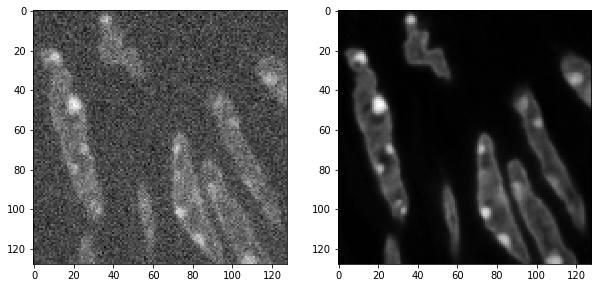

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(mouse_g20_train[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X_train[0], cmap='gray', interpolation='nearest')

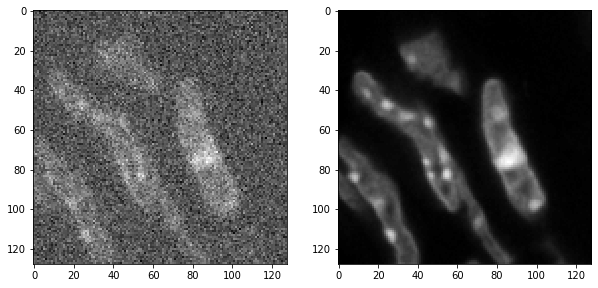

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(mouse_g20_val[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X_val[0], cmap='gray', interpolation='nearest')

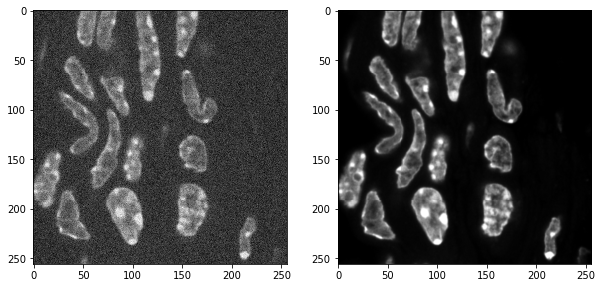

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(mouse_g20_test[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(mouse_g20_test_gt[0,...,0], cmap='gray', interpolation='nearest')

In [11]:
print(mouse_g20_train.min(), mouse_g20_train.max())
print(mouse_g20_val.min(), mouse_g20_val.max())
print(mouse_g20_test.min(), mouse_g20_test.max())

-101.21967915896695 342.12697765780985
-102.85121253719784 326.4477987677801
-109.3374845595414 324.81447097946545


In [12]:
np.savez('../data/Mouse_g20/mouse_g20_train.npz', x_train=mouse_g20_train)
np.savez('../data/Mouse_g20/mouse_g20_val.npz', x_val=mouse_g20_val)
np.savez('../data/Mouse_g20/mouse_g20_test.npz', x_test=mouse_g20_test, gt_test=mouse_g20_test_gt)

### Gaussian Noise: lambda=1, mu=0, sigma=10, 3% s&p

In [13]:
np.random.seed(1451)

In [14]:
def simulation(data, sp=0.03):
    noisy = np.random.poisson(data) + np.random.normal(loc=0.0, scale=10.0, size=data.shape)
    sp_pixels = np.random.uniform(size=data.shape) < sp
    
    uniform = np.random.uniform(size=data.shape)
    
    s_pixels = np.zeros_like(sp_pixels)
    s_pixels[(uniform * sp_pixels) >= 0.5] = 1
    
    p_pixels = np.zeros_like(sp_pixels)
    p_pixels[np.logical_xor(sp_pixels, s_pixels)] = 1
    print("S&P percentage: {}".format(100 * np.sum(sp_pixels)/sp_pixels.ravel().shape[0]))
    print("Salt percentage: {}".format(100 * np.sum(p_pixels)/sp_pixels.ravel().shape[0]))
    print("Pepper percentage: {}".format(100 * np.sum(s_pixels)/sp_pixels.ravel().shape[0]))
    
    noisy = np.clip(noisy, 0, 255)
    noisy[s_pixels] = 0
    noisy[p_pixels] = 255
    
    return noisy

In [15]:
mouse_sp3_train = augment(simulation(X_train, sp=0.03))[..., np.newaxis]
mouse_sp3_val = simulation(X_val, sp=0.03)[..., np.newaxis]
mouse_sp3_test = simulation(X_test, sp=0.03)[..., np.newaxis]
mouse_sp3_test_gt = X_test[..., np.newaxis].copy()

S&P percentage: 3.0015785788649505
Salt percentage: 1.4981912621317457
Pepper percentage: 1.5033873167332048
S&P percentage: 3.0189895629882812
Salt percentage: 1.5179061889648438
Pepper percentage: 1.5010833740234375
S&P percentage: 3.0069835150419775
Salt percentage: 1.4962723006063432
Pepper percentage: 1.5107112144356343


In [16]:
print(mouse_sp3_train.shape)
print(mouse_sp3_val.shape)
print(mouse_sp3_test.shape, mouse_sp3_test_gt.shape)

(7264, 128, 128, 1)
(160, 128, 128, 1)
(67, 256, 256, 1) (67, 256, 256, 1)


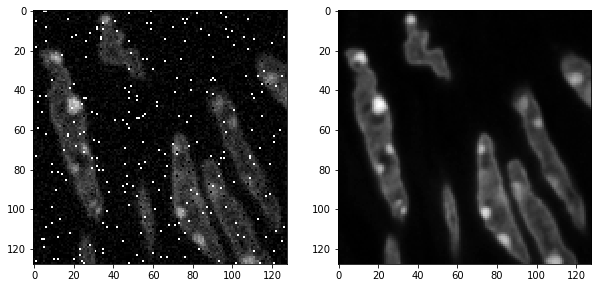

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(mouse_sp3_train[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X_train[0], cmap='gray', interpolation='nearest')

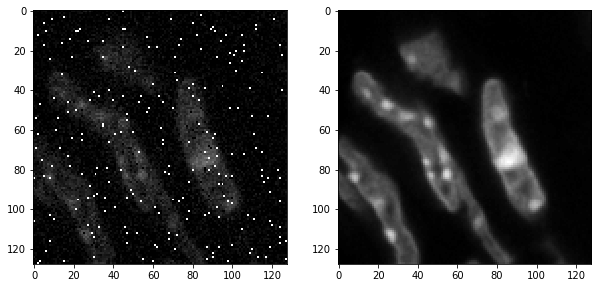

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(mouse_sp3_val[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X_val[0], cmap='gray', interpolation='nearest')

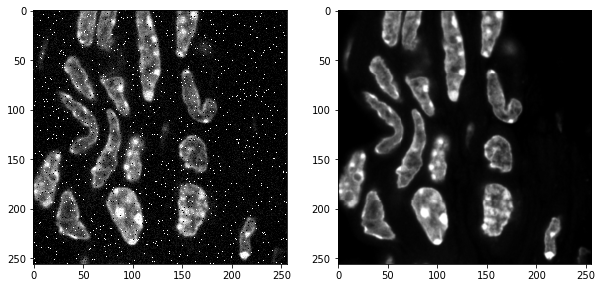

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(mouse_sp3_test[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(mouse_sp3_test_gt[0,...,0], cmap='gray', interpolation='nearest')

In [20]:
print(mouse_sp3_train.min(), mouse_sp3_train.max())
print(mouse_sp3_val.min(), mouse_sp3_val.max())
print(mouse_sp3_test.min(), mouse_sp3_test.max())

0.0 255.0
0.0 255.0
0.0 255.0


In [21]:
np.savez('../data/Mouse_sp3/mouse_sp3_train.npz', x_train=mouse_sp3_train)
np.savez('../data/Mouse_sp3/mouse_sp3_val.npz', x_val=mouse_sp3_val)
np.savez('../data/Mouse_sp3/mouse_sp3_test.npz', x_test=mouse_sp3_test, gt_test=mouse_sp3_test_gt)

### Gaussian Noise: lambda=1, mu=0, sigma=10, 6% s&p

In [22]:
np.random.seed(1452)

In [23]:
mouse_sp6_train = augment(simulation(X_train, sp=0.06))[..., np.newaxis]
mouse_sp6_val = simulation(X_val, sp=0.06)[..., np.newaxis]
mouse_sp6_test = simulation(X_test, sp=0.06)[..., np.newaxis]
mouse_sp6_test_gt = X_test[..., np.newaxis].copy()

S&P percentage: 5.996462111956222
Salt percentage: 3.0022709380162445
Pepper percentage: 2.994191173939978
S&P percentage: 5.994529724121094
Salt percentage: 2.9933547973632812
Pepper percentage: 3.0011749267578125
S&P percentage: 5.983745518015392
Salt percentage: 2.990608784689832
Pepper percentage: 2.9931367333255596


In [24]:
print(mouse_sp6_train.shape)
print(mouse_sp6_val.shape)
print(mouse_sp6_test.shape, mouse_sp6_test_gt.shape)

(7264, 128, 128, 1)
(160, 128, 128, 1)
(67, 256, 256, 1) (67, 256, 256, 1)


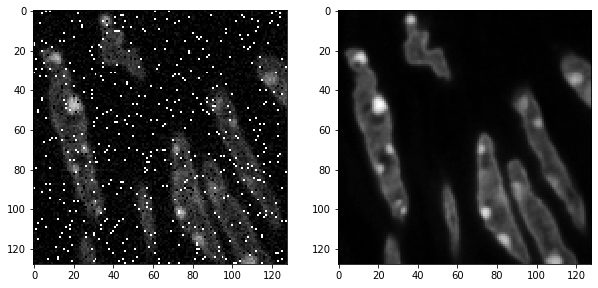

In [25]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(mouse_sp6_train[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X_train[0], cmap='gray', interpolation='nearest')

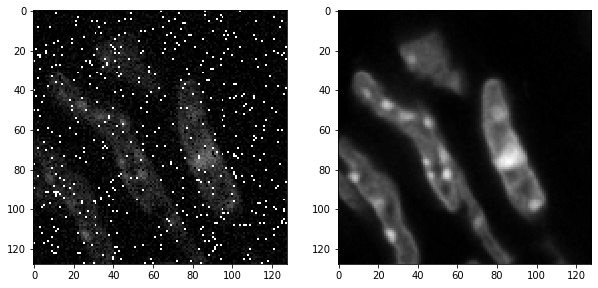

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(mouse_sp6_val[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X_val[0], cmap='gray', interpolation='nearest')

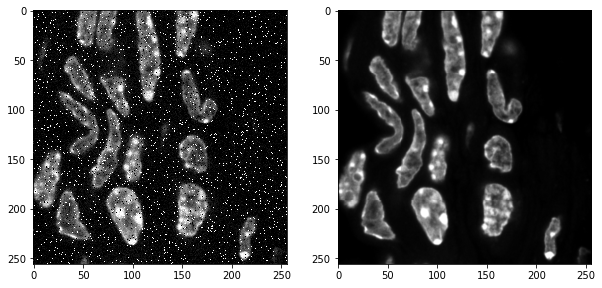

In [27]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(mouse_sp6_test[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(mouse_sp6_test_gt[0,...,0], cmap='gray', interpolation='nearest')

In [28]:
print(mouse_sp6_train.min(), mouse_sp6_train.max())
print(mouse_sp6_val.min(), mouse_sp6_val.max())
print(mouse_sp6_test.min(), mouse_sp6_test.max())

0.0 255.0
0.0 255.0
0.0 255.0


In [29]:
np.savez('../data/Mouse_sp6/mouse_sp6_train.npz', x_train=mouse_sp6_train)
np.savez('../data/Mouse_sp6/mouse_sp6_val.npz', x_val=mouse_sp6_val)
np.savez('../data/Mouse_sp6/mouse_sp6_test.npz', x_test=mouse_sp6_test, gt_test=mouse_sp6_test_gt)

### Gaussian Noise: lambda=1, mu=0, sigma=10, 12% s&p

In [30]:
np.random.seed(1454)

In [31]:
mouse_sp12_train = augment(simulation(X_train, sp=0.12))[..., np.newaxis]
mouse_sp12_val = simulation(X_val, sp=0.12)[..., np.newaxis]
mouse_sp12_test = simulation(X_test, sp=0.12)[..., np.newaxis]
mouse_sp12_test_gt = X_test[..., np.newaxis].copy()

S&P percentage: 11.999384002013354
Salt percentage: 6.000501993994356
Pepper percentage: 5.998882008018998
S&P percentage: 12.000846862792969
Salt percentage: 5.991401672363281
Pepper percentage: 6.0094451904296875
S&P percentage: 12.001310889400653
Salt percentage: 6.000666831856344
Pepper percentage: 6.00064405754431


In [32]:
print(mouse_sp12_train.shape)
print(mouse_sp12_val.shape)
print(mouse_sp12_test.shape, mouse_sp12_test_gt.shape)

(7264, 128, 128, 1)
(160, 128, 128, 1)
(67, 256, 256, 1) (67, 256, 256, 1)


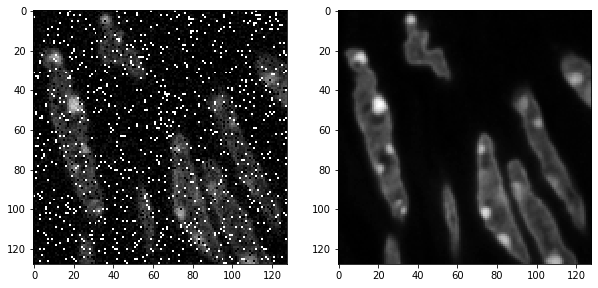

In [33]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(mouse_sp12_train[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X_train[0], cmap='gray', interpolation='nearest')

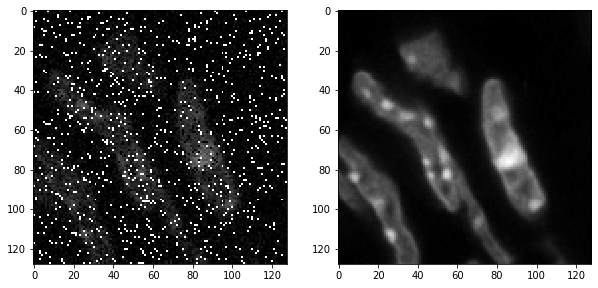

In [34]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(mouse_sp12_val[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X_val[0], cmap='gray', interpolation='nearest')

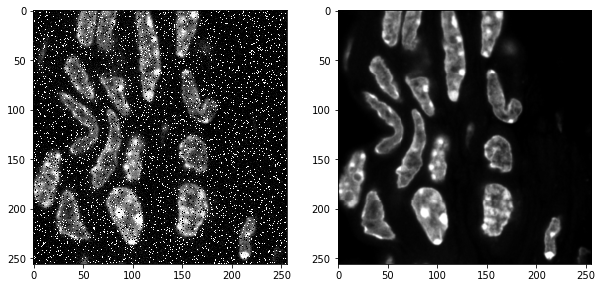

In [35]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(mouse_sp12_test[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(mouse_sp12_test_gt[0,...,0], cmap='gray', interpolation='nearest')

In [36]:
print(mouse_sp12_train.min(), mouse_sp12_train.max())
print(mouse_sp12_val.min(), mouse_sp12_val.max())
print(mouse_sp12_test.min(), mouse_sp12_test.max())

0.0 255.0
0.0 255.0
0.0 255.0


In [37]:
np.savez('../data/Mouse_sp12/mouse_sp12_train.npz', x_train=mouse_sp12_train)
np.savez('../data/Mouse_sp12/mouse_sp12_val.npz', x_val=mouse_sp12_val)
np.savez('../data/Mouse_sp12/mouse_sp12_test.npz', x_test=mouse_sp12_test, gt_test=mouse_sp12_test_gt)

## Flywing

In [38]:
flywing_gt_train = np.load('../data/Flywing_n0/train/train_data.npz')
flywing_gt_test = np.load('../data/Flywing_n0/test/test_data.npz')

In [39]:
X_train, X_val = flywing_gt_train['X_train'], flywing_gt_train['X_val']
X_test = flywing_gt_test['X_test']

### Gaussian Noise: mu=0, sigma=70

In [40]:
np.random.seed(1345)

In [41]:
flywing_g70_train = augment(X_train + np.random.normal(loc=0.0, scale=70.0, size=X_train.shape))[..., np.newaxis]
flywing_g70_val = (X_val + np.random.normal(loc=0.0, scale=70.0, size=X_val.shape))[..., np.newaxis]
flywing_g70_test = (X_test + np.random.normal(loc=0.0, scale=70.0, size=X_test.shape))[..., np.newaxis]
flywing_g70_test_gt = X_test[..., np.newaxis].copy()

In [42]:
print(flywing_g70_train.shape)
print(flywing_g70_val.shape)
print(flywing_g70_test.shape, flywing_g70_test_gt.shape)

(11424, 128, 128, 1)
(252, 128, 128, 1)
(42, 512, 512, 1) (42, 512, 512, 1)


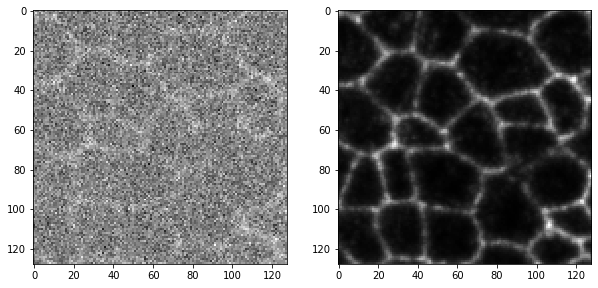

In [43]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(flywing_g70_train[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X_train[0], cmap='gray', interpolation='nearest')

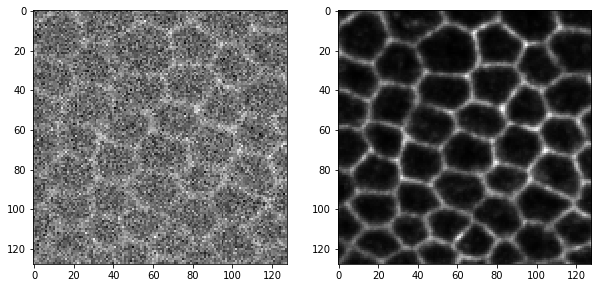

In [44]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(flywing_g70_val[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X_val[0], cmap='gray', interpolation='nearest')

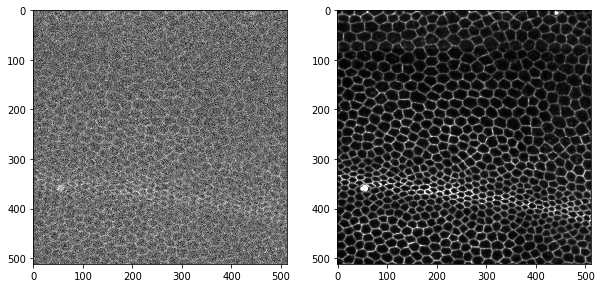

In [45]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(flywing_g70_test[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(flywing_g70_test_gt[0,...,0], cmap='gray', interpolation='nearest')

In [46]:
print(flywing_g70_train.min(), flywing_g70_train.max())
print(flywing_g70_val.min(), flywing_g70_val.max())
print(flywing_g70_test.min(), flywing_g70_test.max())

-349.1689610045053 594.1730804274974
-386.70576958695733 509.30829116775743
-331.52160998602085 528.9993323135296


In [47]:
np.savez('../data/Flywing_g70/mouse_g70_train.npz', x_train=flywing_g70_train)
np.savez('../data/Flywing_g70/mouse_g70_val.npz', x_val=flywing_g70_val)
np.savez('../data/Flywing_g70/mouse_g70_test.npz', x_test=flywing_g70_test, gt_test=flywing_g70_test_gt)

## StructN2V

### Convalaria

In [16]:
from tifffile import imread
data = imread('../data/Convallaria_diaphragm/20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif')

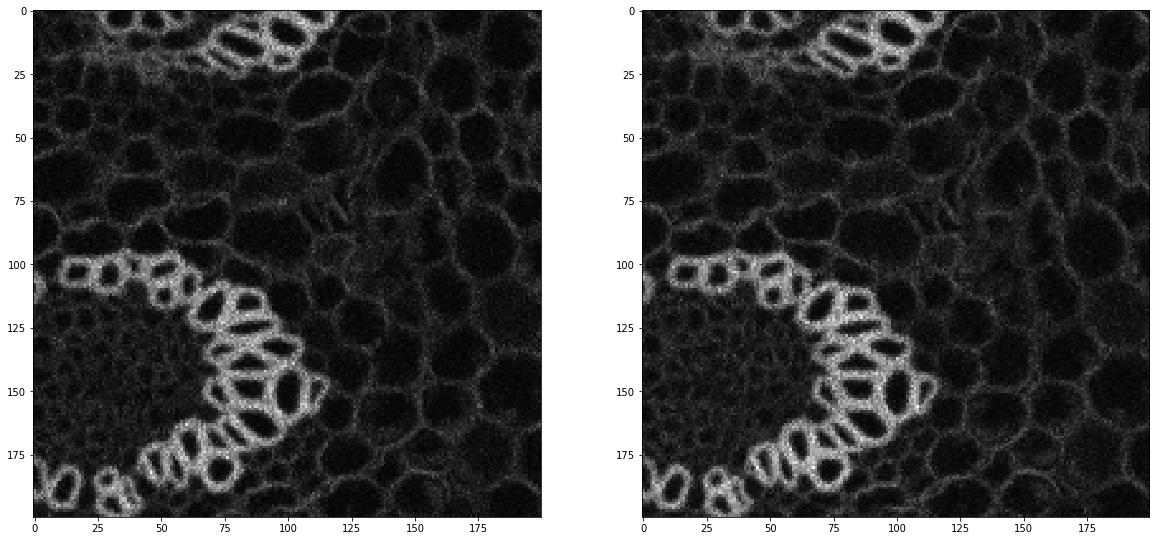

In [17]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(data[0, 200:400, 200:400], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(data[1, 200:400, 200:400], cmap='gray', interpolation='nearest')

In [18]:
patches = []
for y in range(0, 1024, 128):
    for x in range(0, 1024, 128):
        patches.append(data[:, y:y+128, x:x+128])
patches = np.array(patches)

In [19]:
len(patches)

64

In [20]:
train = np.concatenate([p[:-5] for p in patches])
val = np.concatenate([p[-5:] for p in patches])
test = np.mean(data[:, :512, :512], axis=0)[np.newaxis]

In [21]:
print(train.shape, val.shape, test.shape)

(6080, 128, 128) (320, 128, 128) (1, 512, 512)


In [22]:
convallaria_train = augment(train)[..., np.newaxis]
convallaria_val = val[..., np.newaxis]
convallaria_test = data[:, :512, :512][..., np.newaxis]
convallaria_test_gt = np.repeat(test[..., np.newaxis], 100, axis=0)

In [23]:
print(convallaria_train.shape)
print(convallaria_val.shape)
print(convallaria_test.shape, convallaria_test_gt.shape)

(48640, 128, 128, 1)
(320, 128, 128, 1)
(100, 512, 512, 1) (100, 512, 512, 1)


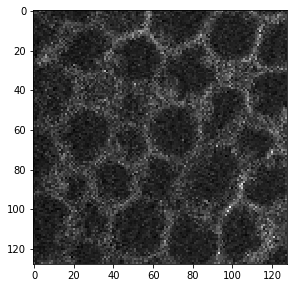

In [24]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(convallaria_train[0,...,0], cmap='gray', interpolation='nearest')

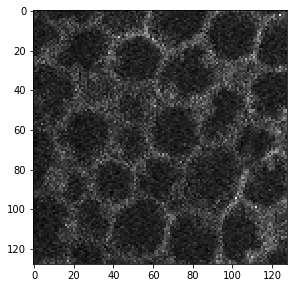

In [25]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(convallaria_val[0,...,0], cmap='gray', interpolation='nearest')

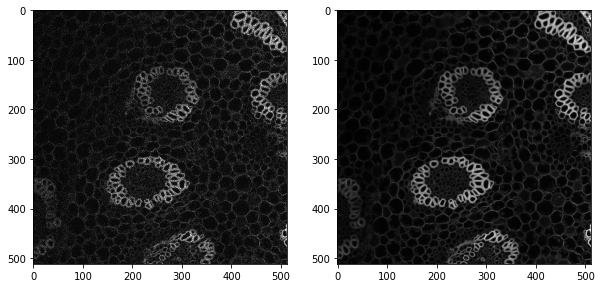

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(convallaria_test[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(convallaria_test_gt[0,...,0], cmap='gray', interpolation='nearest')

In [27]:
print(convallaria_train.min(), convallaria_train.max())
print(convallaria_val.min(), convallaria_val.max())
print(convallaria_test.min(), convallaria_test.max())

234 7389
264 6592
270 5350


In [28]:
np.savez('../data/convallaria/convallaria_train.npz', x_train=convallaria_train)
np.savez('../data/convallaria/convallaria_val.npz', x_val=convallaria_val)
np.savez('../data/convallaria/convallaria_test.npz', x_test=convallaria_test, gt_test=convallaria_test_gt)